In [2]:
'''
고차항 모델 생성과 시각화  
  - 1차항 : 직선(1차 함수) -> y = a.x + b  
  - 2차항 : u자 곡선(2차 함수) -> y = a.x^2 + a.x + b 
  - 3차항 : s자 곡선(3차 함수) -> y = a.x^3 + a.x^2 + a.x + b
'''

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

#########################
## 1. 고차항 모델 생성 
#########################

datas = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/dataset.csv')
datas.head()

,resident,gender,job,age,position,price,survey
0,1,1,1.0,46,4.0,4.1,1
1,2,1,2.0,54,1.0,4.2,2
2,4,2,NaN,45,2.0,3.5,2
3,5,1,3.0,62,1.0,5.0,1
4,3,1,2.0,57,NaN,5.4,2


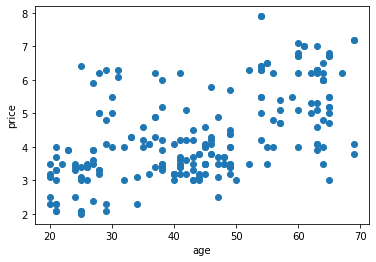

In [4]:
data_col = datas[['age',  'price']]

# age vs price 산점도 
plt.scatter(data_col['age'], data_col['price'])
plt.xlabel('age')
plt.ylabel('price')
plt.show()

In [6]:
x = data_col['age']
y = data_col['price']

In [7]:
# 1차항 회귀계수 생성 
pf1, res1, a, b, c = sp.polyfit(x, y, 1, full = True)
print('1차항 기울기와 절편 : %s'%pf1) 
print('1차항 잔차 : %s'%res1) 

1차항 기울기와 절편 : [0.05455689 1.96116237]
1차항 잔차 : [257.18303728]


<ipython-input-7-a8e0b082dfee>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pf1, res1, a, b, c = sp.polyfit(x, y, 1, full = True)


In [8]:
# 1차항 회귀모델 생성(회귀방정식) 
p1 = sp.poly1d(pf1) # 고차항 모델 
print(p1) # 0.05456 x + 1.961    

 
0.05456 x + 1.961


In [9]:
# [실습] x : age=46 -> price(4.47) 예측치 / 4.1 관측치 
print('y의 예측치 : ', p1(46)) # 0.05456 * x + 1.961 

y의 예측치 :  4.470779190270146


In [10]:
# 2차항 회귀계수 생성 
pf2, res2, a, b, c = sp.polyfit(x, y, 2, full = True)
print('2차항 기울기와 절편 : %s'%pf2) 
print('2차항 잔차 : %s'%res2) 

2차항 기울기와 절편 : [ 8.33372646e-04 -1.86892455e-02  3.40254480e+00]
2차항 잔차 : [251.93685793]


<ipython-input-10-b94aec25788a>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pf2, res2, a, b, c = sp.polyfit(x, y, 2, full = True)


In [12]:
# 2차항 회귀모델 생성(회귀방정식) 
p2 = sp.poly1d(pf2) # 고차항 모델 
print(p2) # 0.05456 x + 1.961


           2
0.0008334 x - 0.01869 x + 3.403


In [13]:
# [실습] x : age=46 -> price(4.30) 예측치 / 4.1 관측치  
print('y의 예측치 : ', p2(46))

y의 예측치 :  4.306256023664981


In [14]:
# 3차항 회귀계수 생성 
pf3, res3, a, b, c = sp.polyfit(x, y, 3, full = True)
print('3차항 기울기와 절편 : %s'%pf3) 
print('3차항 잔차 : %s'%res3) 

3차항 기울기와 절편 : [ 2.17130289e-05 -2.01987108e-03  9.81605624e-02  1.93394974e+00]
3차항 잔차 : [251.48447764]


<ipython-input-14-40fca662c7ed>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  pf3, res3, a, b, c = sp.polyfit(x, y, 3, full = True)


In [15]:
# 3차항 회귀모델 생성(회귀방정식) 
p3 = sp.poly1d(pf3) # 고차항 모델 
print(p3)

           3           2
2.171e-05 x - 0.00202 x + 0.09816 x + 1.934


In [16]:
# [실습] x : age=46 -> price(4.28) 예측치 / 4.1 관측치  
print('y의 예측치 : ', p3(46))

y의 예측치 :  4.288747790298787


In [17]:
#########################
## 2. 고차항 모델 시각화 
#########################

# 고차항에 따른 색, 선 스타일 지정 
colors = ['g', 'r', 'b'] 
linestyles = ['-', '-.', '--']

In [18]:
# 고차항 모델 시각화 함수 
def plot_model(x, y, models=None):
    plt.scatter(x, y) # 산점도 
    plt.axis([0, 80, 0, 9]) # x, y축 범위 
    
    if models :
        x = sp.linspace(0, 90, num=50) # 회귀선 x축  vector   
        # zip : model 수 만큼 차트 생성 
        # model : [p1-직선, p2-U자, p3-S자]    
        for model, color, line in zip(models, colors, linestyles) :             
            # 회귀선 : plt.plot(x(벡터), y(고차항모델), c, linestyle)
            plt.plot(x, model(x), c=color, linestyle=line)
        
        # 범례 표시 : m.order(항수) -> d=1, d=2, d=3
        plt.legend( ["d=%i" %m.order for m in models], loc='upper left' )  
    plt.show()

<ipython-input-18-b89bbea348b2>:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = sp.linspace(0, 90, num=50) # 회귀선 x축  vector


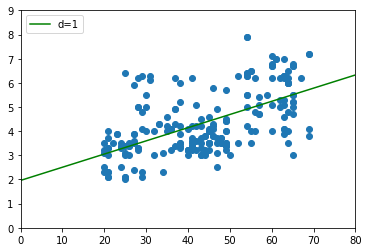

<ipython-input-18-b89bbea348b2>:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = sp.linspace(0, 90, num=50) # 회귀선 x축  vector


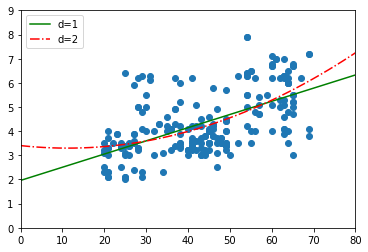

<ipython-input-18-b89bbea348b2>:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = sp.linspace(0, 90, num=50) # 회귀선 x축  vector


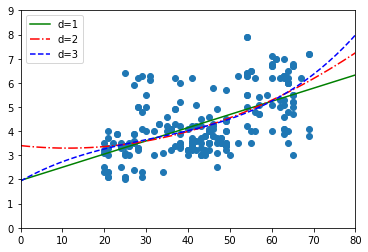

In [19]:
# 고차항 모델이 있는 경우 
plot_model(x, y, [p1]) # 1차항 모델 - 직선 
plot_model(x, y, [p1, p2]) # 1차항, 2차항 모델- 직선,U자 
plot_model(x, y, [p1, p2, p3]) # 1,2,3차항 모델-직선/U/S자 

In [20]:
'''
[실습]
zip(), linspace()
'''

# 1. zip() : 1:1 원소 묶음 
z = zip([1,2,3], [4,5,6])
print(z) # <zip object>
print(list(z)) # [(1, 4), (2, 5), (3, 6)]

[(1, 4), (2, 5), (3, 6)]


In [21]:
# model 갯수에 묶음 원소가 다름  
model = [1, 2, 3]
z = zip(model, ['r','g','b'], ['-', '-.','--'])
print( list(z) )
'''
[(1, 'r', '-')] -> model[1] 
[(1, 'r', '-'), (2, 'g', '-.')] -> model[1,2]
[(1, 'r', '-'), (2, 'g', '-.'), (3, 'b', '--')] -> model[1,2,3]
'''

[(1, 'r', '-'), (2, 'g', '-.'), (3, 'b', '--')]


In [22]:
# 2. sp.linspace : 특정 범위 내에서 지정한 갯수 만큼 vector 생성    
#help(sp.linspace) # endpoint=True : 끝 점 stop 기준 

# 0~90범위 내에서 5개 원소 생성
spl = sp.linspace(0, 90, num=5) # endpoint=True 
print(90/4) # 22.5
print(spl) # [  0.   22.5  45.   67.5  90. ]

22.5
[ 0.  22.5 45.  67.5 90. ]


<ipython-input-22-b05a66dc9518>:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  spl = sp.linspace(0, 90, num=5) # endpoint=True


In [23]:
# endpoint=False
spl2 = sp.linspace(0, 90, num=5, endpoint=False)
print(90/5) # 18.0
print(spl2) # [  0.  18.  36.  54.  72.]

18.0
[ 0. 18. 36. 54. 72.]


<ipython-input-23-e1feb9ee0fbd>:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  spl2 = sp.linspace(0, 90, num=5, endpoint=False)


In [24]:
# 1차항 회귀모델의 예측치 
x = 46
print(p1(x)) # p1(x) -> y 예측치 : 4.47077919027
print(p1(spl)) # p1(spl) -> y 예측치 : vector 예측치 
'''
x : [  0.   22.5  45.   67.5  90. ]
y : [ 1.96116237  3.18869234  4.4162223   5.64375227  6.87128223]
'''

4.470779190270146
[1.96116237 3.18869234 4.4162223  5.64375227 6.87128223]


In [25]:
# 3. 범례의 항수 출력 
models = [p1, p2, p3]
[print(m.order) for m in models] # 1 2 3

1
2
3


[None, None, None]